# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Reading and understanding Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/MySkills/Clustering/Mall_Customers (1).csv')
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = raw_data.set_index(['CustomerID'])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
mapping = { "Gender" : {"Male":0, "Female":1}}    #mengubah nilai male : 0 dan female : 1
data.replace(mapping, inplace=True)
mapping

{'Gender': {'Female': 1, 'Male': 0}}

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [ ]:
#data.describe(include='all').iloc[:, :]
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
data.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

### This provides us the number of unique values present in our data

In [ ]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### This shows we have no null values in our data hence can now move forward with plotting

# Pair plotting of data

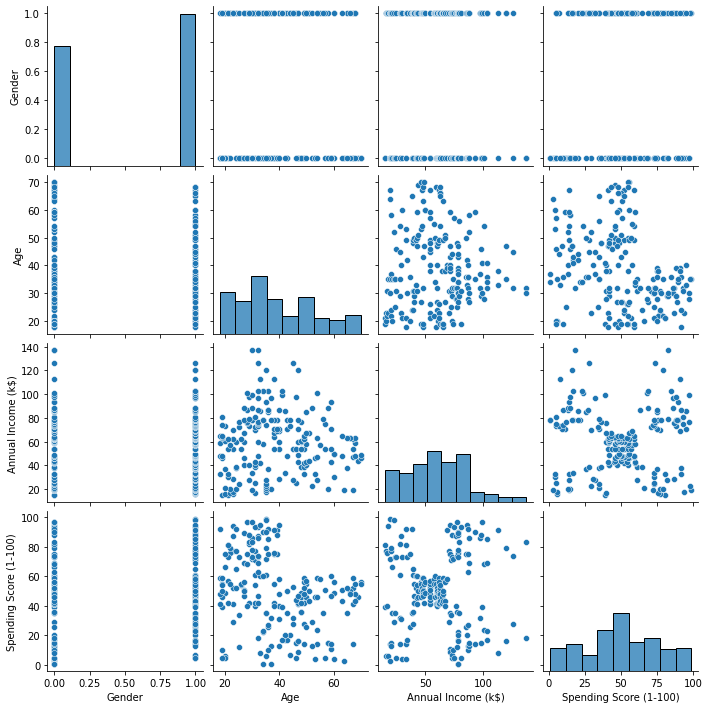

In [ ]:
sns.pairplot(data)      #plot gabungan

# Correlation Matrix

In [ ]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


### Correlation Matrix using Matplotlib

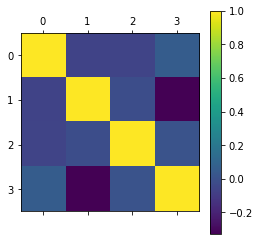

In [ ]:
plt.matshow(data.corr())
plt.colorbar()

### Correlation matrix using SNS

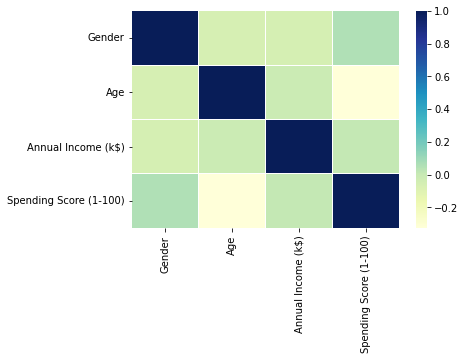

In [ ]:
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', linewidths='0.1')

In [ ]:
corr.style.background_gradient(cmap='coolwarm')   #list cmap
                                                  #https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


# Building Elbow method graph for identifying number of clusters

In [ ]:
## Building The Elbow Method Graph with full data
wcss = []
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss

[212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75412.59682443162,
 58348.641363315044,
 51167.19736842104,
 44687.235534005464,
 40926.190692640695]

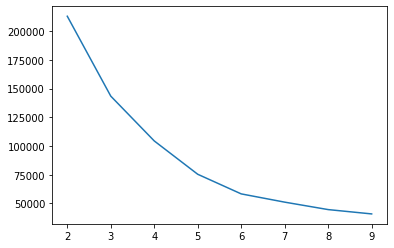

In [ ]:
plt.plot(range(2,10), wcss) #sb x jumlah klaster, sb y : inersianya

## Silhouette Score for identifying number of clusters

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-20
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(data)
    labels = algorithm.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

In [ ]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.40553486600451777,
 0.44424291275274114,
 0.45205475380756527,
 0.44096462877395787,
 0.427541566977401,
 0.4149775782469488]

In [ ]:
kmeans_6 = KMeans(6)
kmeans_6.fit(data)
clusters = data.copy()
clusters['prediction'] = kmeans.fit_predict(data)
clusters[:15]

,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction
CustomerID,,,,,
1,0,19,15,39,5
2,0,21,15,81,2
3,1,20,16,6,5
4,1,23,16,77,2
5,1,31,17,40,5
6,1,22,17,76,2
7,1,35,18,6,5
8,1,23,18,94,2
9,0,64,19,3,5


Text(0.5, 0, 'Spending Score (1-100)')

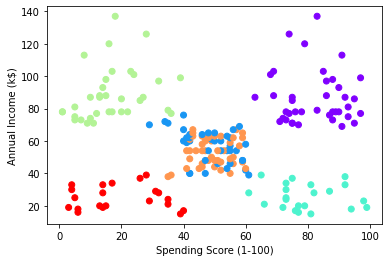

In [ ]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'], c= clusters['prediction'], cmap='rainbow')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')

Text(0.5, 0, 'Spending Score (1-100)')

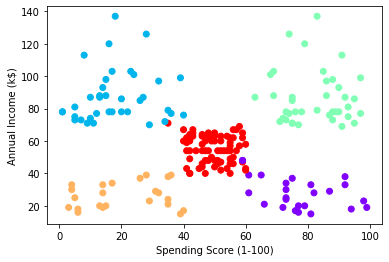

In [ ]:
kmeans_5 = KMeans(5)
kmeans_5.fit(data)
clusters = data.copy()
clusters['prediction'] = kmeans.fit_predict(data)
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'], c= clusters['prediction'], cmap='rainbow')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')

In [ ]:
clusters.groupby('prediction').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
prediction,,,,
0,0.560000,24.960000,28.040000,77.000000
1,0.486486,40.324324,87.432432,18.189189
2,0.538462,32.692308,86.538462,82.128205
3,0.608696,45.217391,26.304348,20.913043
4,0.592105,43.934211,55.210526,49.447368


### This divided the middle cluster into further parts which is not required so K=5 looks like the best option hence we'll stop here as k=5 is the best approach